<a href="https://colab.research.google.com/github/plue1011/ObjectDetection/blob/master/ImagePath2DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


パッケージのimport

In [0]:
import glob
# XMLをファイルやテキストから読み込んだり、加工したり、保存したりするためのライブラリ
import xml.etree.ElementTree as ET

import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

データの解凍

In [0]:
!tar -zxf /content/drive/My\ Drive/study/CNN/dataset/RoadDamageDataset.tar.gz

# フォルダの確認

In [0]:
root_path = "/content/RoadDamageDataset/Adachi/"

In [45]:
glob.glob(root_path + "ImageSets/Main/*")

['/content/RoadDamageDataset/Adachi/ImageSets/Main/val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D20_train.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D01_train.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D44_val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D10_train.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D11_trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D00_trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D20_trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D11_train.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/train_val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D10_val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D00_val.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D44_trainval.txt',
 '/content/RoadDamageDataset/Adachi/ImageSets/Main/D10_trainval

In [46]:
glob.glob(root_path + "Annotations/*")[:10]

['/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170906093924.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170906102608.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170907140311.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908100119.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170914151307.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170906152354.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908145945.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170911105006.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908144319.xml',
 '/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908134738.xml']

In [47]:
glob.glob(root_path + "JPEGImages/*")[:10]

['/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170912152211.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170921111658.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170921111435.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170912144027.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170908100748.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170912093908.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170920150551.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170911104748.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170906150630.jpg',
 '/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170914151632.jpg']

# データのパスリスト作成

/content/RoadDamageDataset/Adachi/ImageSets/Main/train.txtには学習用のデータIDが入っている

In [52]:
id_names = root_path + "ImageSets/Main/train.txt"
id_names

'/content/RoadDamageDataset/Adachi/ImageSets/Main/train.txt'

In [53]:
for line in open(id_names):
    print(line)
    file_id = line.strip()  # 空白スペースと改行を除去
    print(file_id)
    img_path = root_path + "JPEGImages/" + file_id + ".jpg"
    anno_path = root_path + "Annotations/" + file_id + ".xml"
    print(img_path)
    print(anno_path)
    break

Adachi_20170908100929

Adachi_20170908100929
/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170908100929.jpg
/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908100929.xml


In [0]:
def make_data_path_list(root_path, train_val):
    # 学習データの画像ファイルとアノテーションファイルへのパスリストを作成
    img_list = []
    anno_list = []

    id_names = root_path + "ImageSets/Main/" + train_val + ".txt"

    for line in open(id_names):
        file_id = line.strip()  # 空白スペースと改行を除去
        img_path = root_path + "JPEGImages/" + file_id + ".jpg"
        anno_path = root_path + "Annotations/" + file_id + ".xml"
        img_list.append(img_path)
        anno_list.append(anno_path)

    return img_list, anno_list

In [58]:
# ファイルリストの作成
train_img_path_list, train_anno_path_list = make_data_path_list(root_path, "train")
# 動作確認
print(train_img_path_list[0])
print(train_anno_path_list[0])

/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170908100929.jpg
/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908100929.xml


In [59]:
# ファイルリストの作成
val_img_path_list, val_anno_path_list = make_data_path_list(root_path, "val")
# 動作確認
print(val_img_path_list[0])
print(val_anno_path_list[0])

/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170908142224.jpg
/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908142224.xml


# xmlファイルをリストに変換する

Adachi_20170908100929.xml
```xml
<annotation>
    <folder>Adachi</folder>
    <filename>Adachi_20170908100929.jpg</filename>
    <size>
        <width>600</width>
        <height>600</height>
    </size>
    <segmented>0</segmented>
    <object>
        <name>D10</name>
        <bndbox>
            <xmin>170</xmin>
            <ymin>284</ymin>
            <xmax>361</xmax>
            <ymax>462</ymax>
        </bndbox>
    </object>
    <object>
        <name>D01</name>
        <bndbox>
            <xmin>375</xmin>
            <ymin>186</ymin>
            <xmax>595</xmax>
            <ymax>476</ymax>
        </bndbox>
    </object>
</annotation>
```

In [63]:
train_anno_path_list[0]

'/content/RoadDamageDataset/Adachi/Annotations/Adachi_20170908100929.xml'

In [0]:
# xmlファイルを読み込む
xml_path = train_anno_path_list[0]
xml = ET.parse(xml_path).getroot()

In [67]:
# xmlファイルの全タグ
print([tag_name.tag for tag_name in  xml.iter()])
box_list = []
for obj in xml.iter("object"):
    print("object_name:{}".format(obj.find("name").text))

    bbox = obj.find('bndbox')  # バウンディングボックスの情報
    pts = ['xmin', 'ymin', 'xmax', 'ymax']
    box = []
    for pt in (pts):
        box.append(int(bbox.find(pt).text))
        print("{}:{}".format(pt, bbox.find(pt).text))
    box_list.append(box)

['annotation', 'folder', 'filename', 'size', 'width', 'height', 'segmented', 'object', 'name', 'bndbox', 'xmin', 'ymin', 'xmax', 'ymax', 'object', 'name', 'bndbox', 'xmin', 'ymin', 'xmax', 'ymax']
object_name:D10
xmin:170
ymin:284
xmax:361
ymax:462
object_name:D01
xmin:375
ymin:186
xmax:595
ymax:476


[[170, 284, 361, 462], [375, 186, 595, 476]]

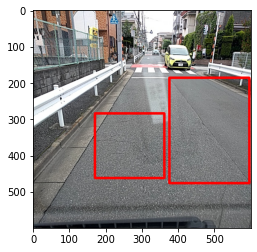

In [79]:
# 動作確認
img = cv2.imread(train_img_path_list[0])  # [高さ][幅][色BGR]
for pos in box_list:
    xmin, ymin, xmax, ymax = pos[:4]
    
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
# 「XML形式のアノテーション」を、リスト形式に変換するクラス
class Anno_xml2list(object):
    """
    1枚の画像に対する「XML形式のアノテーションデータ」を、画像サイズで規格化してからリスト形式に変換する。

    Attributes
    ----------
    classes : リスト
        VOCのクラス名を格納したリスト
    """

    # 矩形のクラスリストを入力する
    def __init__(self, classes):
        self.classes = classes

    def __call__(self, xml_path, width, height):
        """
        1枚の画像に対する「XML形式のアノテーションデータ」を、画像サイズで規格化してからリスト形式に変換する。

        Parameters
        ----------
        xml_path : str
            xmlファイルへのパス。
        width : int
            対象画像の幅。
        height : int
            対象画像の高さ。

        Returns
        -------
        ret : [[xmin, ymin, xmax, ymax, label_ind], ... ]
            物体のアノテーションデータを格納したリスト。画像内に存在する物体数分のだけ要素を持つ。
        """

        # 画像内の全ての物体のアノテーションをこのリストに格納します
        ret = []

        # xmlファイルを読み込む
        xml = ET.parse(xml_path).getroot()

        # 画像内にある物体（object）の数だけループする
        for obj in xml.iter('object'):
            # 1つの物体に対するアノテーションを格納するリスト
            bndbox = []

            name = obj.find('name').text.strip()  # 物体名
            bbox = obj.find('bndbox')  # バウンディングボックスの情報

            # アノテーションの xmin, ymin, xmax, ymaxを取得し、0～1に規格化
            pts = ['xmin', 'ymin', 'xmax', 'ymax']

            for pt in (pts):
                # damagedatasetは原点が(1,1)なので1を引き算して（0, 0）に
                # https://github.com/IshitaTakeshi/RoadDamageDetector/wiki/Road-Damage-Dataset
                cur_pixel = int(bbox.find(pt).text) - 1

                # 幅、高さで規格化
                if pt == 'xmin' or pt == 'xmax':  # x方向のときは幅で割算
                    cur_pixel /= width
                else:  # y方向のときは高さで割算
                    cur_pixel /= height

                bndbox.append(cur_pixel)

            # アノテーションのクラス名のindexを取得して追加
            label_idx = self.classes.index(name)
            bndbox.append(label_idx)

            # retに[xmin, ymin, xmax, ymax, label_ind]を足す
            ret += [bndbox]

        return np.array(ret)  # [[xmin, ymin, xmax, ymax, label_idx], ... ]

In [75]:
# 動作確認
# バウディングボックスのクラス
damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# インスタンスの作成
transform_anno = Anno_xml2list(damageTypes)

# 画像の読み込み OpenCVを使用
img = cv2.imread(train_img_path_list[0])  # [高さ][幅][色BGR]
height, width, channels = img.shape  # 画像のサイズを取得

# アノテーションをリストで表示
anno_info = transform_anno(train_anno_path_list[0], width, height)
anno_info

array([[0.28166667, 0.47166667, 0.6       , 0.76833333, 2.        ],
       [0.62333333, 0.30833333, 0.99      , 0.79166667, 1.        ]])

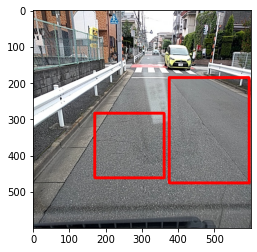

In [82]:
for anno in anno_info:
    # 規格化を元に戻す
    xmin, ymin, xmax, ymax = anno[:4]
    xmin *= width
    xmax *= width
    ymin *= height
    ymax *= height
    
    cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0,0,255), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()